In [1]:
import jax
import jax.numpy as jnp
import optax

# from nets import datasets
from localization.datasets.nonlinear_gp import NonlinearGPDataset
from nets.launch import configs
from nets.models.feedforward import MLP
from localization.models.feedforward import SimpleNet
from nets import samplers
# from nets.simulators.online_sgd import train_step, eval_step, evaluate, simulate
from localization.experiments.online_sgd import simulate
# from nets.experiments.analyzable_online_sgd.launcher_local import SearchConfig

ModuleNotFoundError: No module named 'experiments.online_sgd'

In [ ]:
from dataclasses import dataclass
from dataclasses import field
from nets.launch.hparams import Param
from nets.launch.hparams import EnumParam
from nets.launch.hparams import FixedParam

@dataclass(frozen=True, kw_only=True)
class SearchConfig(configs.Config):
  """Generic config for a hyperparameter search."""

  seed: Param = field(default_factory=lambda: FixedParam(0))

  # Model params.
  # num_ins: Param = field(default_factory=lambda: FixedParam(4))
  num_hiddens: Param = field(default_factory=lambda: FixedParam(100))
  init_scale: Param = field(default_factory=lambda: FixedParam(0.01))
  num_dimensions: Param = field(default_factory=lambda: FixedParam(40))

  # Training and evaluation params.
  optimizer_fn: Param = field(default_factory=lambda: FixedParam(optax.adam))
  learning_rate: Param = field(default_factory=lambda: FixedParam(1e-3))
  batch_size: Param = field(default_factory=lambda: FixedParam(100))
  num_epochs: Param = field(default_factory=lambda: FixedParam(1))

  # Dataset params.
  dataset_cls: Param = field(default_factory=lambda: FixedParam(NonlinearGPDataset))
  xi1: Param = field(default_factory=lambda: FixedParam(0.1))
  xi2: Param = field(default_factory=lambda: FixedParam(1.1))
  gain: Param = field(default_factory=lambda: FixedParam(1.0))
  # num_dimensions: Param = field(default_factory=lambda: FixedParam(4))
  sampler_cls: Param = field(default_factory=lambda: FixedParam(samplers.EpochSampler))
  
#   dataset_cls: Param = field(init=False)
#   num_dimensions: Param = field(init=False)
#   num_exemplars_per_class: Param = field(init=False)
#   exemplar_noise_scale: Param = field(init=False)

  # Sampler params.
#   sampler_cls: Param = field(init=False)

In [3]:
search_config = SearchConfig(key=jax.random.PRNGKey(0), num_configs=1)
params = search_config[0]
simulate(**params)

Using JAX backend: cpu

Using configuration:
{'batch_size': 100,
 'dataset_cls': <class 'datasets.nonlinear_gp.NonlinearGPDataset'>,
 'gain': 1.0,
 'init_scale': 0.01,
 'learning_rate': 0.001,
 'num_dimensions': 40,
 'num_epochs': 1,
 'num_hiddens': 100,
 'optimizer_fn': <function adam at 0x13b186fc0>,
 'sampler_cls': <class 'nets.samplers.base.EpochSampler'>,
 'seed': 0,
 'xi1': 0.1,
 'xi2': 1.1}

simulate: len(dataset)=1000
Model:
SimpleNet(
  fc1=Linear(
    weight=f32[100,40],
    bias=f32[100],
    in_features=40,
    out_features=100,
    use_bias=True
  ),
  act=<wrapped function <lambda>>
)

Starting evaluation...


10it [00:01,  7.55it/s]


Completed evaluation over 1000 examples in 1.35 secs.
####
ITERATION 0
eval set:

	loss:			1.0002896785736084
	accuracy:		0.0
	BASELINE:		50.00%
	GT labels:		[ 1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
  1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1.
 -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.
 -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.
  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.
  1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1.  1

0it [00:00, ?it/s]


ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape float32[].
The problem arose with the `float` function. If trying to convert the data type of a value, try using `x.astype(float)` or `jnp.array(x, float)` instead.

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.ConcretizationTypeError

## Dataset

In [3]:
import jax
import jax.numpy as jnp
import equinox as eqx
from jaxtyping import Array
from jax.random import KeyArray

key = jax.random.PRNGKey(0)
model = SimpleNet(
    in_features=2,
    hidden_features=4,
    out_features=1,
    act=jnp.tanh,
    # drop=0.,
    key=key,
    init_scale=1.
)
# model = MLP(**params)

In [4]:
batch_size = 2
x, y = jnp.ones((batch_size, 2)), jnp.ones(batch_size)
(key,) = jax.random.split(key, 1)
model(x[0], key=key)

<PjitFunction of <function jax.numpy.tanh at 0x11c28e2a0>>


Array(0.28076008, dtype=float32)

In [5]:
def mse(pred_y: Array, y: Array) -> Array:
  """Compute elementwise mean squared error."""
  return jnp.square(pred_y - y).mean(axis=-1)


@eqx.filter_value_and_grad
def compute_loss(model: eqx.Module, x: Array, y: Array, key: KeyArray) -> Array:
  """Compute cross-entropy loss on a single example."""
  # print(x.shape, y.shape)
  keys = jax.random.split(key, x.shape[0])
  pred_y = jax.vmap(model)(x, key=keys)
  loss = mse(pred_y, y)
  # print(jnp.mean(jnp.abs(pred_y)).item())
  return loss.mean()

In [6]:
loss, grads = compute_loss(model, x, y, key=key)

<PjitFunction of <function jax.numpy.tanh at 0x11c28e2a0>>


In [7]:
grads(x[0], key=key)

None


TypeError: 'NoneType' object is not callable

In [8]:
jax.grad(model.__call__)(x[0], key=key)

Array([-0.3679621 ,  0.56394064], dtype=float32)

In [8]:
jax.grad(model.act)(2.)

Array(0.07065082, dtype=float32, weak_type=True)

In [6]:
import jax
import jax.numpy as jnp
from jax.scipy.special import erf as gain_function

def Z(g):
    return jnp.sqrt( (2/jnp.pi) * jnp.arcsin( (g**2) / (1 + (g**2)) ) )

def generate_non_gaussian(key, xi, L, g, method="svd"):
    C = jnp.abs(jnp.tile(jnp.arange(L)[:, jnp.newaxis], (1, L)) - jnp.tile(jnp.arange(L), (L, 1)))
    C = jnp.exp(-C ** 2 / (xi ** 2))
    z = jax.random.multivariate_normal(key, jnp.zeros(L, dtype=jnp.float32), C, method=method)
    x = gain_function(g * z) / Z(g)
    return x

key = jax.random.PRNGKey(10)
print( generate_non_gaussian(key, 4.47, 10, 1.0, "cholesky") )
print( generate_non_gaussian(key, 4.47, 10, 1.0, "eigh") )
print( generate_non_gaussian(key, 4.47, 10, 1.0, "svd") )

[ 0.85148734  0.67855173  0.7205672   0.8708827   0.8832751   0.5805833
 -0.05241916 -0.6859384  -1.0033146  -1.0130293 ]
[-0.66802067 -0.7000762  -0.65242016 -0.4202959   0.06340472  0.6294176
  1.0039158   1.1587341   1.2208383   1.2977833 ]
[ 0.8291346   0.20659159 -0.38434792 -0.82971936 -1.1346496  -1.3027519
 -1.3131083  -1.0827589  -0.43163848  0.5297522 ]


In [47]:
import numpy as np
from scipy.special import erf as gain_function

def Z(g):
    return np.sqrt( (2/np.pi) * np.arcsin( (g**2) / (1 + (g**2)) ) )

def generate_non_gaussian(xi, L, g):
    C = np.abs(np.tile(jnp.arange(L)[:, np.newaxis], (1, L)) - np.tile(np.arange(L), (L, 1)))
    C = -C ** 2 / (xi ** 2)
    print(C.min(), C.max())
    C = np.exp(C)#-C ** 2 / (xi ** 2))
    print(C.min(), C.max())
    print(np.linalg.norm(C - C.T))
    z = np.random.multivariate_normal(np.zeros(L, dtype=np.float32), C)
    # print(z)
    x = gain_function(g * z) / Z(g)
    return x

generate_non_gaussian(4.47, 100, 1.0)

-490.51844511508494 0.0
9.344283683987794e-214 1.0
0.0


array([-1.54891939, -1.51287565, -1.48423348, -1.4549705 , -1.37988648,
       -1.17491775, -0.75829416, -0.22930115,  0.10143989,  0.01759758,
       -0.49526407, -1.1405603 , -1.51700782, -1.63815109, -1.65584137,
       -1.61534692, -1.48108181, -1.15562726, -0.52919494,  0.27638698,
        0.81959246,  0.85928576,  0.31014739, -0.6276994 , -1.17190218,
       -1.1413023 , -0.39232522,  0.98435388,  1.63800183,  1.72327758,
        1.72940663,  1.72540715,  1.66188252,  1.13662467, -0.06246403,
       -0.8875065 , -1.14644109, -1.11390957, -0.92821984, -0.72658798,
       -0.64141659, -0.64801138, -0.56271989, -0.16161808,  0.61157206,
        1.30576444,  1.58365093,  1.63551361,  1.58172505,  1.37797921,
        0.96661578,  0.37972625, -0.37193023, -1.13257522, -1.55322124,
       -1.67026464, -1.67974384, -1.61017492, -1.2964218 , -0.47742614,
        0.51555853,  1.0602738 ,  1.13652464,  0.79209087, -0.03192705,
       -0.90073183, -1.31342751, -1.36873313, -1.19169719, -0.85

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from conv_emergence import compute_entropy
from localization.experiments import make_key_nonlinear_gp, make_key_single_pulse

def position_mean_var(weight):
    # use weights to construct probability distribution
    magnitude = np.square(weight)
    magnitude /= np.sum(magnitude, axis=-1).reshape(-1,1)

    # compute first and second order stats
    L = weight.shape[-1]
    x = np.arange(L)
    first = np.sum(x * magnitude, axis=-1)
    second = np.sum(x * x * magnitude, axis=-1)
    var = second - first ** 2
    return first, var

def plot_receptive_field(weights, figsize=(10, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    weights = weights[np.argsort(compute_entropy(weights))]
    ax.imshow(weights, cmap='gray')#, vmin=-1, vmax=1)
    ax.set_xlabel('Input neurons')
    ax.set_ylabel('Hidden neurons')
    return fig, ax

def entropy_sort(weights: list, ind: int = -1, center_sort=False):
    weight_ = weights[ind]
    l = weight_.shape[0]
    entropy = compute_entropy(weight_)
    reordering = np.argsort(entropy)
    if center_sort:
        conv_ = weight_[reordering[:l//2]]
        centers = np.mean(np.abs(conv_) * np.arange(conv_.shape[1]), axis=1)
        reordering[:l//2] = reordering[:l//2][np.argsort(centers)]
    return reordering

def mean_sort(weights: list, ind: int = -1):
    mu, var = position_mean_var(weights[ind])
    return np.argsort(mu)
        
def var_sort(weights: list, ind: int = -1):
    mu, var = position_mean_var(weights[ind])
    return np.argsort(var)

def plot_receptive_fields(weights: list, num_cols=None, evaluation_interval=500, figsize=(10, 5), reordering_fn=None, **reordering_kwargs):
    num_cols = num_cols or len(weights)
    num_rows = int(np.ceil(len(weights) / num_cols))
    
    # determine ordering
    reordering = reordering_fn(weights=weights, **reordering_kwargs) if reordering_fn is not None else np.arange(weights.shape[1])
    
    # plot each set of weights
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    axs_ = axs.flatten()
    min_, max_ = np.min([np.min(weight_) for weight_ in weights]), np.max([np.max(weight_) for weight_ in weights])
    for i, (weight, ax) in enumerate(zip(weights, axs_)):
        ax.imshow(weight[reordering], cmap='gray', vmin=min_, vmax=max_)
        ax.set_xlabel(evaluation_interval * i)
        ax.set_xticks([])
        if i == 0:
            # ax.set_xlabel('Input neurons')
            ax.set_ylabel('Hidden neurons')
        else:
            ax.set_yticks([])
            
    # remove unused axes
    for ax in axs_.flatten()[len(weights):]:
        ax.remove()
    
    return fig, axs

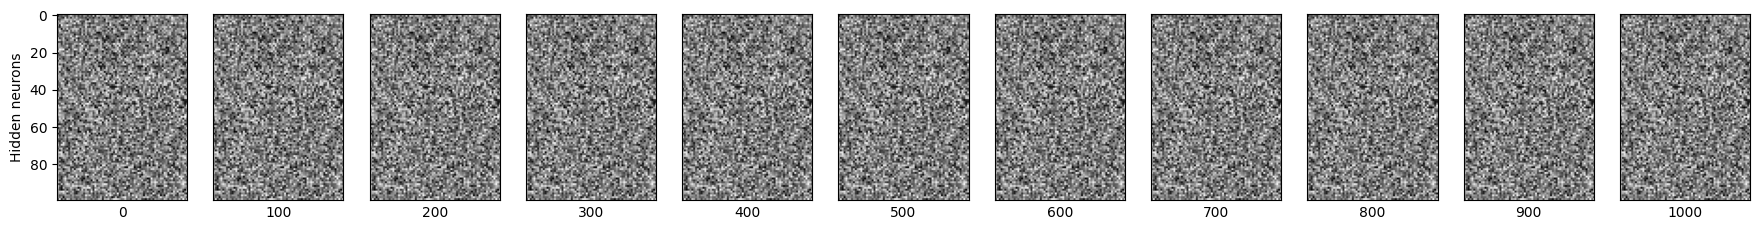

In [4]:
xi1_lower, xi1_upper, xi2_lower, xi2_upper = 50, 55, 5, 10 # 4.47, 0.1
gain, class_proportion = 100., 0.5
L, K = 70, 100 # 40
batch_size, num_epochs, lr, init_scale = 100, 1000, 0.1, 0.01
evaluation_interval = 100
# path_key = make_key_nonlinear_gp(xi1, xi2, gain, L, K, batch_size, num_epochs, lr, 'tanh', 0.0, init_scale)
path_key = make_key_single_pulse(xi1_lower, xi1_upper, xi2_lower, xi2_upper, L, K, batch_size, num_epochs, lr, 'tanh', 0.0, init_scale, 'lecun_normal_init', class_proportion)
weights = np.load(f"results/weights/{path_key}/fc1.npy")
fig, axs = plot_receptive_fields(weights, num_cols=20, figsize=(40, 20), reordering_fn=entropy_sort, ind=-1, center_sort=True, evaluation_interval=evaluation_interval)
fig.savefig(f"results/weights/{path_key}/receptive_fields.png", dpi=300, bbox_inches='tight')

In [3]:
# np.save(f'weights/pretrained_weights_L={L}_K={K}.npy', weights[-1])

In [4]:
path_key

'pulse_xi1_lower=03.00_xi1_upper=04.00_xi2_lower=01.00_xi2_upper=02.00_L=008_K=025_dim=1_batch_size=100_num_epochs=2500_loss=mse_lr=1.000_activation=tanh_second_layer=0.0_init_scale=1.000_xavier_normal_init_p=0.50'

In [5]:
import jax
import jax.numpy as jnp
import datasets
d = datasets.SinglePulseDataset(
    key=jax.random.PRNGKey(0),
    xi1_lower=xi1_lower, xi1_upper=xi1_upper, xi2_lower=xi2_lower, xi2_upper=xi2_upper,
    class_proportion=class_proportion,
    num_dimensions=L, num_exemplars=batch_size*num_epochs
)

datasets.single_pulse.generate_pulse(
    key=jax.random.PRNGKey(0),
    xi_lower=1, xi_upper=2,
    L=8
)

Array([ 1., -1., -1., -1., -1., -1.,  1.,  1.], dtype=float32, weak_type=True)